In [29]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [30]:
bench = pd.read_csv('Bench.csv')
squat = pd.read_csv('Squat.csv')
deadlift = pd.read_csv('Deadlift.csv')

In [31]:
bench.axes

[RangeIndex(start=0, stop=372, step=1),
 Index(['Time', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z'], dtype='object')]

In [32]:
def process_signal(sig, interval, normalize=False):
    if normalize: 
        mean = np.mean(sig)
        std = np.std(sig)
        sig = (sig - mean)/std
    if interval not in sig.shape:
        sig = sig.reshape(-1, 1)
    pad_len = interval - (sig.shape[0] % interval)
    if pad_len != interval:
        padding = np.zeros((pad_len, sig.shape[1]))
        padding[:, :] = sig[-1, -1]
        sig = np.concatenate([sig, padding], axis=0)
    sig = sig.reshape(-1, interval, sig.shape[1])
    sig = np.squeeze(sig)
    return sig

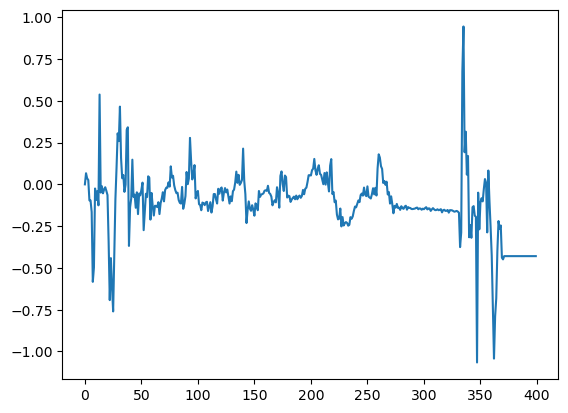

In [33]:
b = process_signal(bench['Accel_X'].values, interval=100)
plt.plot(b.reshape((-1, )))

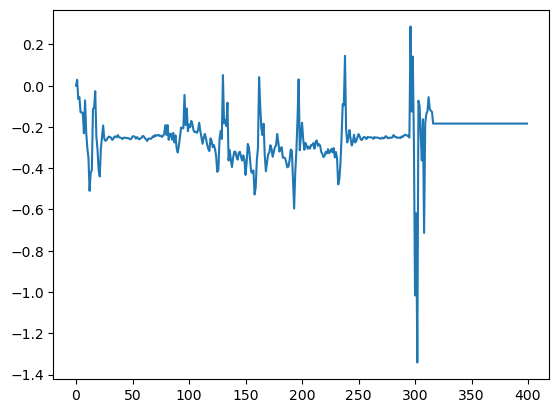

In [34]:
b = process_signal(squat['Accel_X'].values, interval=100)
plt.plot(b.reshape((-1, )))

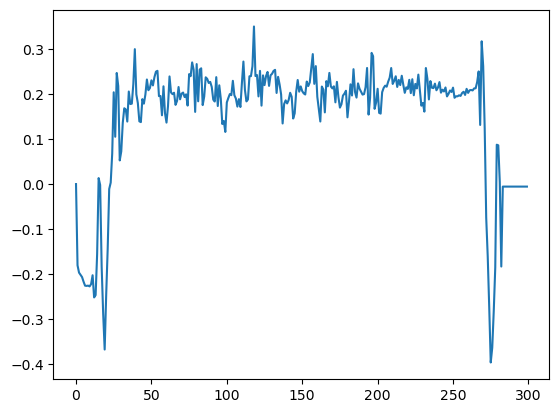

In [35]:
b = process_signal(deadlift['Accel_X'].values, interval=100)
plt.plot(b.reshape((-1, )))

In [37]:
bench_train_x = np.concatenate([process_signal(bench['Accel_X'].values, interval=100)])
bench_train_y = [0] * len(bench_train_x)

squat_train_x = np.concatenate([process_signal(squat['Accel_X'].values, interval=100)])
squat_train_y = [0] * len(squat_train_x)

deadlift_train_x = np.concatenate([process_signal(deadlift['Accel_X'].values, interval=100)])
deadlift_train_y = [0] * len(squat_train_x)

In [40]:
deadlift_train_x.shape

(3, 100)

In [44]:
num_to_use = 1


In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=2, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(2),
])

model(bench_train_x[0].reshape((-1, 1)))

ValueError: Input 0 of layer "conv1d_6" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (100, 1)